<a href="https://colab.research.google.com/github/AndC314/ActivityProject/blob/master/Practice_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman2

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
## dataset generation
X, y = make_friedman2(n_samples=200, noise=1, random_state=42)
df = pd.DataFrame(X, columns = ['Temperature','Energy','Torque','Gap'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.4)
## model to use
lr = LinearRegression()

The dataset has been generated with an array of features X and the output y. 

The task is to:

1.   Create a simple linear model to predict y
2.   Evaluate feature importances
3. Improve the results


Some libraries are imported but feel free to use whatever you think is best.


In [80]:
lr.fit(X_train, y_train)
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.8785474009945631, 0.8477565001755369)

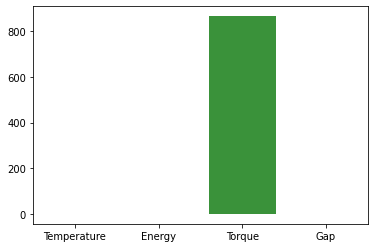

In [81]:
sns.barplot(x=list(df), y=lr.coef_)

In [82]:
sc = StandardScaler()
X_std = sc.fit_transform(X_train)
X_tstd = sc.transform(X_test)

In [83]:
lr.fit(X_std, y_train)
lr.score(X_tstd, y_test)

0.8477565001755367

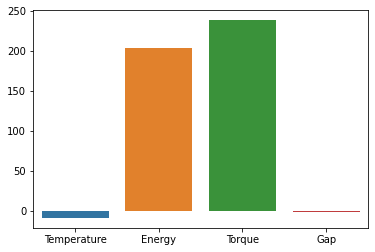

In [84]:
sns.barplot(x=list(df), y=lr.coef_)

In [65]:
df.head()

,Temperature,Energy,Torque,Gap
0,37.454012,1678.777388,0.731994,6.986585
1,15.601864,380.500750,0.058084,9.661761
2,60.111501,1282.391023,0.020584,10.699099
3,83.244264,472.546861,0.181825,2.834045
4,30.424224,982.920600,0.431945,3.912291


In [75]:
df['1-2'] = df['Temperature']*df['Energy']
df['2-3'] = df['Energy']*df['Torque']
df['3-4'] = df['Torque'] * df['Gap']
df['1-3'] = df['Temperature']*df['Torque']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(df, y, random_state=42, test_size=0.4) 

In [76]:
lr.fit(X_train_p, y_train_p)
lr.score(X_test_p, y_test_p)

0.9997513648317733

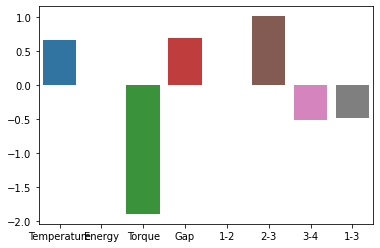

In [77]:
sns.barplot(x=list(df), y=lr.coef_)